<a href="https://colab.research.google.com/github/SebastienLiger/Portfolio-Finance/blob/Finance/Fronti%C3%A8re_Efficiente_Equity_Value_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import re
from io import StringIO
from datetime import datetime, timedelta
import requests
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
# HISTORICAL PRICES BY COMPANY FROM 2020-01-01 TO 2024-01-01

start_date = "2020-01-01"
end_date = "2024-01-01"

symbols = ["3877.HK", "ENELCHILE.SN", "DAL", "VZ",
    "CRK", "CMA", "DAC", "FCNCA", "NYCB", "CEIX", "VTRS", "PSX", "EQT", "VTLE", "OVV", "CAR", "VLO", "AGCO", "VOW.DE", "IAG.VI", "PKN.WA", "RNO.PA", "AF.PA",
    "8TRA.DE", "REP.MC", "MT.AS", "SAB.MC", "STLAM.MI", "LHAB.F", "UBS", "1T4.F", "MAU.PA", "ABN.AS", "ETL.PA", "PGE.WA", "UCG.MI", "BP" ]

tickers_to_names = {
    "3877.HK": "CSSC Shipping Company",
    "ENELCHILE.SN": "ENEL CHILE",
    "DAL": "Delta Air Lines",
    "VZ": "Verizon Communications",
    "CRK": "Comstock Resources",
    "CMA": "Comerica",
    "DAC": "Danaos Corp",
    "FCNCA": "First Citizens Bancshares",
    "NYCB": "New York Community Bancorp",
    "CEIX": "CONSOL Energy",
    "VTRS": "Viatris",
    "PSX": "Phillips 66",
    "EQT": "EQT",
    "VTLE": "VITAL ENERGY",
    "OVV": "Ovintiv",
    "CAR": "Avis Budget Group",
    "VLO": "Valero Energy",
    "AGCO": "AGCO",
    "VOW.DE": "Volkswagen",
    "IAG.VI": "International Airlines",
    "PKN.WA": "ORLEN",
    "RNO.PA": "Renault",
    "AF.PA": "Air France",
    "8TRA.DE": "Traton",
    "REP.MC": "Repsol",
    "MT.AS": "ArcelorMittal",
    "SAB.MC": "Banco de Sabadell",
    "STLAM.MI": "Stellantis",
    "LHAB.F": "Deutsche Lufthansa",
    "UBS": "UBS",
    "1T4.F": "TORM plc",
    "MAU.PA": "Etablissements Maurel & Prom",
    "ABN.AS": "ABN AMRO Bank",
    "ETL.PA": "Eutelsat Communications",
    "PGE.WA": "PGE Polska Grupa Energetyczna",
    "UCG.MI": "UniCredit",
    "BP": "BP"
}

# Téléchargement des données
stocks_df = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Renommer les colonnes du DataFrame selon les noms des sociétés
stocks_df_renamed = stocks_df.rename(columns=tickers_to_names)

# Appliquer le formatage pour afficher seulement 2 décimales et ajouter le signe euros
formatted_df_euros = stocks_df_renamed.applymap(lambda x: f"€{x:.2f}")

# Affichage du DataFrame formaté avec le signe euros et deux décimales
formatted_df_euros

[*********************100%%**********************]  37 of 37 completed


Ticker,TORM plc,CSSC Shipping Company,Traton,ABN AMRO Bank,Air France,AGCO,BP,Avis Budget Group,CONSOL Energy,Comerica,...,Renault,Banco de Sabadell,Stellantis,UBS,UniCredit,Valero Energy,Volkswagen,VITAL ENERGY,Viatris,Verizon Communications
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,...,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan
2020-01-02,€6.11,€0.96,€21.07,€13.23,€51.70,€68.05,€30.40,€31.67,€13.68,€58.66,...,€39.25,€0.92,€8.16,€11.25,€10.82,€78.45,€136.14,€55.20,€18.29,€48.60
2020-01-03,€6.06,€0.94,€20.89,€13.04,€47.60,€67.11,€30.95,€31.04,€13.50,€57.77,...,€38.61,€0.91,€7.99,€11.06,€10.70,€75.48,€133.95,€56.40,€17.89,€48.08
2020-01-06,€5.88,€0.94,€20.62,€12.89,€47.16,€66.44,€31.76,€31.23,€12.99,€56.93,...,€38.73,€0.91,€7.88,€11.04,€10.50,€75.48,€134.45,€60.00,€18.48,€47.98
2020-01-07,€5.84,€0.92,€20.66,€13.04,€47.38,€65.83,€31.43,€31.37,€12.59,€56.55,...,€40.10,€0.91,€7.91,€11.26,€10.56,€76.47,€134.33,€59.40,€18.75,€47.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,...,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan
2023-12-26,€nan,€nan,€nan,€nan,€nan,€122.26,€35.24,€180.85,€103.58,€56.28,...,€nan,€nan,€nan,€31.04,€nan,€132.19,€nan,€47.73,€10.61,€36.86
2023-12-27,€27.54,€1.42,€21.86,€13.65,€13.68,€122.00,€35.29,€179.51,€103.17,€56.29,...,€37.49,€1.10,€21.23,€31.19,€24.45,€130.83,€119.50,€47.29,€10.67,€36.69


In [3]:
# HISTORICAL ANNUALIZED RETURN BY COMPANY FROM 2020-01-01 TO 2024-01-01

# Calculer les rendements quotidiens des actions
daily_returns = stocks_df_renamed.pct_change()

# Calculer les rendements annuels moyens des actions
annual_return = (daily_returns.mean() * 250) + 1  # Multiplier par 250 jours ouvrables

# Calculer la covariance des rendements quotidiens et annuels
cov_daily = daily_returns.cov()
cov_annual = cov_daily * 250

# Création d'un tableau pour afficher les rendements annuels moyens avec les noms des sociétés
annual_return_table = pd.DataFrame(annual_return, columns=["Rendement Annuel"])
annual_return_table

,Rendement Annuel
Ticker,
TORM plc,1.517456
CSSC Shipping Company,1.171462
Traton,1.072052
ABN AMRO Bank,1.095615
Air France,0.806198
AGCO,1.223389
BP,1.115009
Avis Budget Group,1.821683
CONSOL Energy,1.808532


In [4]:
# PORTFOLIO SIMULATION (RETURN, VOLATILITY, SHARPE RATIO, ALLOCATION)
num_portfolios = 10000  # Nombre de portefeuilles à simuler
num_stocks = len(symbols)  # Nombre d'actions dans votre portefeuille

treasuries_us = yf.Ticker("^TNX")

# Essayez de récupérer les données sur une plus grande période pour s'assurer d'obtenir la dernière donnée
current_data_risk_free_rate = treasuries_us.history(period="1mo")  # Changement de '1d' à '1mo'

# Vérifiez si des données de prix sont disponibles et récupérez la dernière donnée non nulle
if not current_data_risk_free_rate.empty and not current_data_risk_free_rate["Close"].dropna().empty:
    current_price_risk_free_rate = current_data_risk_free_rate["Close"].dropna().iloc[-1]
    current_price_RFR = current_price_risk_free_rate / 100
else:
    # Si aucune donnée n'est disponible, définir une valeur par défaut ou gérer l'erreur
    print("Aucune donnée de taux sans risque disponible pour ^TNX.")
    # Utiliser une valeur de taux sans risque par défaut
    current_price_RFR = 0.03

# Containers pour les résultats
portfolio_returns = []
portfolio_volatility = []
sharpe_ratios = []
stock_weights = []

for _ in range(num_portfolios):
    # Générer des poids aléatoires pour chaque action
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)  # Normaliser les poids pour qu'ils somment à 1
    stock_weights.append(weights)

    # Calculer le rendement et la volatilité du portefeuille pour les poids générés
    returns = np.sum(weights * daily_returns.mean()) * 252
    volatility = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))

    # Calculer le ratio de Sharpe
    sharpe_ratio = (returns - current_price_RFR) / volatility

    # Ajouter les résultats aux listes
    portfolio_returns.append(returns)
    portfolio_volatility.append(volatility)
    sharpe_ratios.append(sharpe_ratio)

# Créer un DataFrame avec les résultats
portfolio_data = {
    'Returns': portfolio_returns,
    'Volatility': portfolio_volatility,
    'Sharpe Ratio': sharpe_ratios
}

# Ajouter les poids des actions au DataFrame en utilisant les noms des sociétés
for counter, symbol in enumerate(symbols):
    # Utiliser tickers_to_names pour obtenir le nom de la société à partir du ticker
    company_name = tickers_to_names.get(symbol, symbol)  # Garde le symbole si le nom n'est pas trouvé
    portfolio_data[company_name + ' Weight'] = [weights[counter] for weights in stock_weights]

df = pd.DataFrame(portfolio_data)
df

,Returns,Volatility,Sharpe Ratio,CSSC Shipping Company Weight,ENEL CHILE Weight,Delta Air Lines Weight,Verizon Communications Weight,Comstock Resources Weight,Comerica Weight,Danaos Corp Weight,...,Stellantis Weight,Deutsche Lufthansa Weight,UBS Weight,TORM plc Weight,Etablissements Maurel & Prom Weight,ABN AMRO Bank Weight,Eutelsat Communications Weight,PGE Polska Grupa Energetyczna Weight,UniCredit Weight,BP Weight
0,0.252789,0.309903,0.680435,0.040248,0.001842,0.023009,0.036318,0.020409,0.025975,0.040810,...,0.006970,0.039598,0.007047,0.032591,0.020619,0.048712,0.042361,0.042783,0.019062,0.031954
1,0.260463,0.309112,0.707002,0.036101,0.009231,0.047968,0.035653,0.006575,0.025721,0.023490,...,0.020540,0.027554,0.044472,0.025958,0.000234,0.043343,0.046308,0.042646,0.010954,0.000598
2,0.195051,0.282963,0.541169,0.025286,0.027950,0.049229,0.018891,0.018016,0.030097,0.008242,...,0.016362,0.043140,0.015066,0.022786,0.039205,0.016978,0.009537,0.040247,0.046242,0.050558
3,0.197487,0.292809,0.531294,0.014345,0.008411,0.001757,0.042692,0.051354,0.024773,0.009778,...,0.018661,0.003275,0.049462,0.049228,0.022173,0.010100,0.043076,0.039330,0.042500,0.042758
4,0.195828,0.277639,0.554348,0.028543,0.005064,0.054027,0.026661,0.035974,0.048722,0.002685,...,0.024360,0.023418,0.048997,0.044555,0.041865,0.027101,0.001273,0.010966,0.017161,0.035170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.253186,0.302144,0.699224,0.046159,0.011924,0.029295,0.043322,0.029256,0.019191,0.016253,...,0.027127,0.000828,0.044409,0.038351,0.013479,0.034175,0.046266,0.013748,0.038474,0.036195
9996,0.196623,0.315021,0.491087,0.009758,0.011322,0.008237,0.005846,0.044779,0.050836,0.001682,...,0.006277,0.029468,0.022007,0.008647,0.053980,0.058600,0.028464,0.060900,0.011798,0.035042
9997,0.240124,0.287318,0.689840,0.034592,0.060784,0.028715,0.047182,0.013022,0.020754,0.016478,...,0.006340,0.004513,0.001279,0.015880,0.026077,0.027689,0.016701,0.056758,0.040998,0.014762
9998,0.215993,0.284034,0.612860,0.038402,0.037258,0.013662,0.029201,0.022028,0.015757,0.000213,...,0.041988,0.036691,0.025656,0.022405,0.049901,0.024886,0.007355,0.040294,0.024215,0.044495


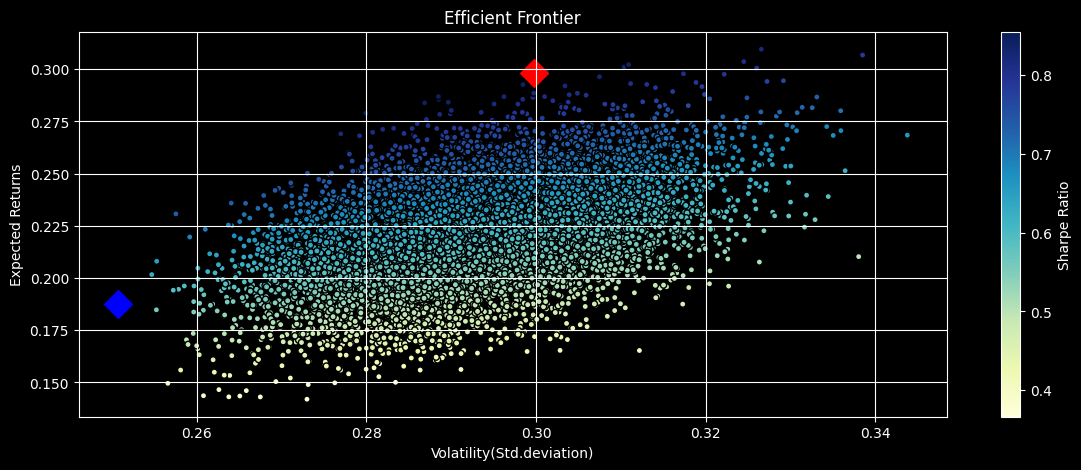

╒══════════════════════════════════════╤════════════════════════════════╤════════════════════════════╕
│                                      │ Minimum Risk Adjusted Values   │ Max Risk Adjusted Values   │
╞══════════════════════════════════════╪════════════════════════════════╪════════════════════════════╡
│ Returns                              │ 18.77%                         │ 29.83%                     │
├──────────────────────────────────────┼────────────────────────────────┼────────────────────────────┤
│ Volatility                           │ 25.07%                         │ 29.98%                     │
├──────────────────────────────────────┼────────────────────────────────┼────────────────────────────┤
│ Sharpe Ratio                         │ 58.13%                         │ 85.53%                     │
├──────────────────────────────────────┼────────────────────────────────┼────────────────────────────┤
│ CSSC Shipping Company Weight         │ 4.80%                          │

In [5]:
# FINAL ALLOCATION IN ORDER TO DECREASE VOLATILITY OR INCREASE EXPECTED RETURN

min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

max_sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

plt.style.use("dark_background")
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='YlGnBu', edgecolors='black', figsize=(14, 5), grid=True)
plt.scatter(x=max_sharpe_portfolio['Volatility'], y=max_sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200)
plt.xlabel('Volatility(Std.deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

r_ef = pd.concat([min_variance_port.T, max_sharpe_portfolio.T], axis=1)
r_ef.columns = ["Minimum Risk Adjusted Values", "Max Risk Adjusted Values"]

# Formatage des données
def format_value(x):
    if isinstance(x, float):
        # Pour le ratio de Sharpe, format avec 3 décimales
        if x > 1:
            return f"{x:.3f}"
        # Pour les poids, conversion en pourcentage avec 2 décimales
        else:
            return f"{x*100:.2f}%"
    return x

r_ef = r_ef.applymap(format_value)
from tabulate import tabulate

print(tabulate(r_ef, headers='keys', tablefmt='fancy_grid'))